In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

In [3]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for relevant columns
df = df[['location', 'date', 'new_cases']]


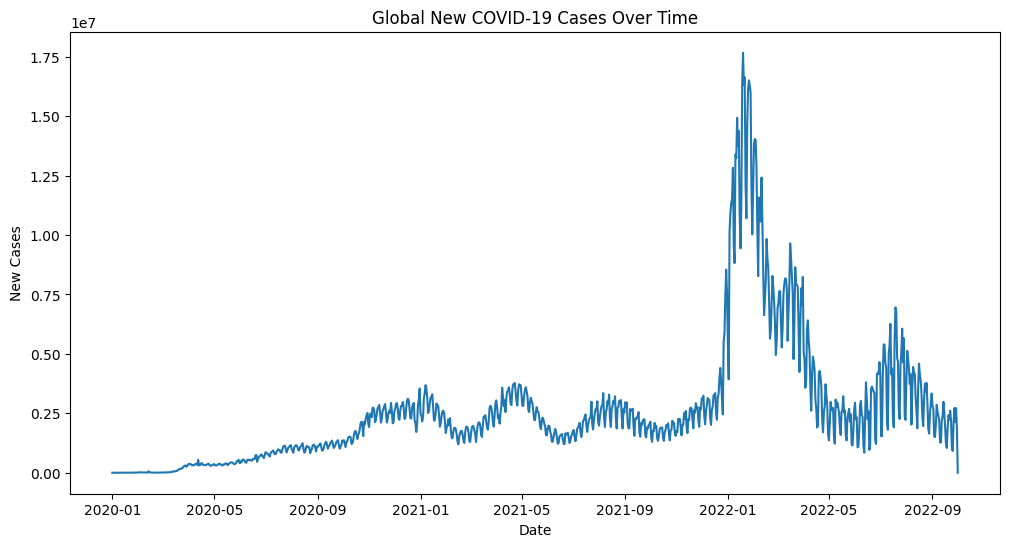

In [4]:
# Group data by date to get global new cases
global_cases = df.groupby('date')['new_cases'].sum().reset_index()

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=global_cases, x='date', y='new_cases')
plt.title('Global New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()


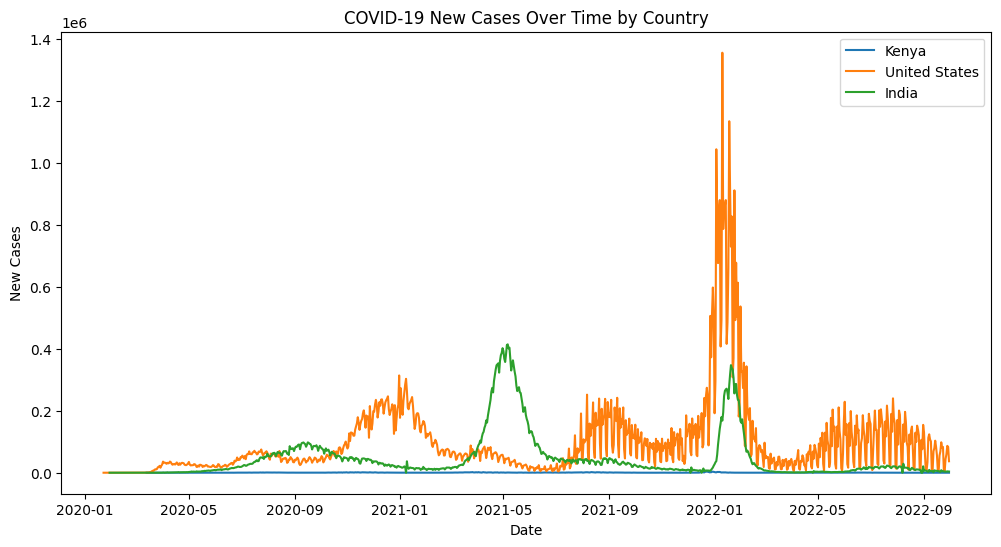

In [5]:
# List of countries to analyze
countries = ['Kenya', 'United States', 'India']

# Plotting
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    sns.lineplot(data=country_data, x='date', y='new_cases', label=country)

plt.title('COVID-19 New Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()


In [6]:
df['7d_avg'] = df['new_cases'].rolling(window=7).mean()
df['7d_avg']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
220338    36.000000
220339    31.428571
220340    36.142857
220341    21.428571
220342    25.142857
Name: 7d_avg, Length: 220343, dtype: float64

In [7]:
peak_idx = df['new_cases'].idxmax()
peak_date = df.loc[peak_idx, 'date']
peak_cases = df.loc[peak_idx, 'new_cases']


In [8]:
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
df = df[['date', 'location', 'new_cases', 'total_cases', 'new_deaths', 'total_deaths', 'people_vaccinated_per_hundred']]
df['date'] = pd.to_datetime(df['date'])
df = df[df['location'] == 'Kenya']


In [9]:
df

,date,location,new_cases,total_cases,new_deaths,total_deaths,people_vaccinated_per_hundred
103435,2020-03-06,Kenya,NaN,NaN,NaN,NaN,NaN
103436,2020-03-07,Kenya,NaN,NaN,NaN,NaN,NaN
103437,2020-03-08,Kenya,NaN,NaN,NaN,NaN,NaN
103438,2020-03-09,Kenya,NaN,NaN,NaN,NaN,NaN
103439,2020-03-10,Kenya,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
104369,2022-09-26,Kenya,0.0,338390.0,0.0,5675.0,NaN
104370,2022-09-27,Kenya,14.0,338404.0,0.0,5675.0,NaN
104371,2022-09-28,Kenya,16.0,338420.0,3.0,5678.0,NaN
104372,2022-09-29,Kenya,0.0,338420.0,0.0,5678.0,NaN


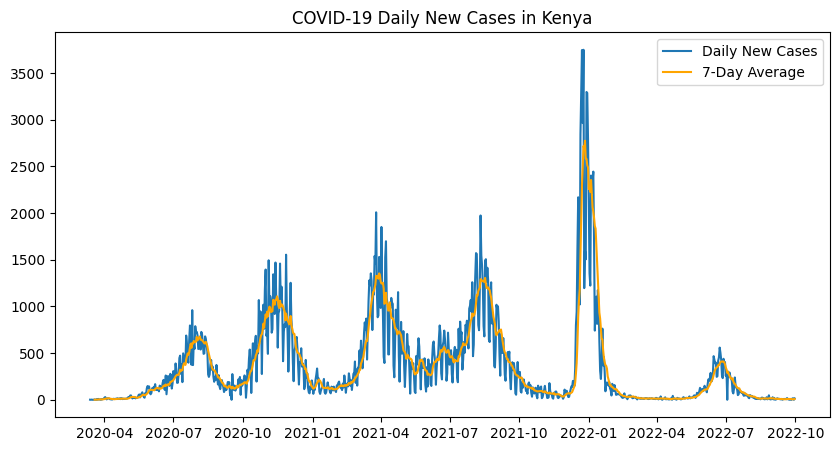

In [10]:
import matplotlib.pyplot as plt
df['7_day_avg'] = df['new_cases'].rolling(window=7).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['new_cases'], label='Daily New Cases')
plt.plot(df['date'], df['7_day_avg'], label='7-Day Average', color='orange')
plt.title('COVID-19 Daily New Cases in Kenya')
plt.legend()
plt.show()


In [11]:
peak_day = df[df['new_cases'] == df['new_cases'].max()]
peak_day

,date,location,new_cases,total_cases,new_deaths,total_deaths,people_vaccinated_per_hundred,7_day_avg
104094,2021-12-25,Kenya,3749.0,281358.0,2.0,5359.0,NaN,2717.571429


In [12]:
df['CFR'] = (df['total_deaths'] / df['total_cases']) * 100
df['CFR']

103435         NaN
103436         NaN
103437         NaN
103438         NaN
103439         NaN
            ...   
104369    1.677059
104370    1.676990
104371    1.677797
104372    1.677797
104373    1.677727
Name: CFR, Length: 939, dtype: float64

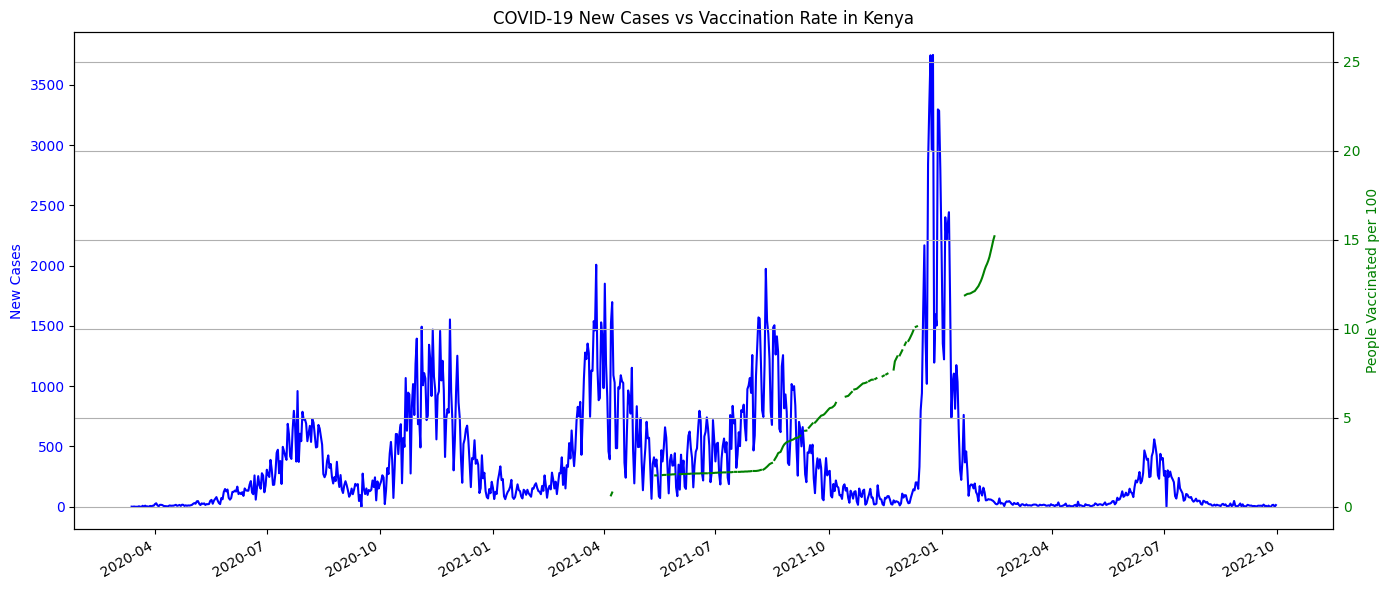

In [13]:
import matplotlib.pyplot as plt

# Set figure size for better spacing
fig, ax1 = plt.subplots(figsize=(14, 6))

# Create a twin axis
ax2 = ax1.twinx()

# Plot new COVID-19 cases
ax1.plot(df['date'], df['new_cases'], color='blue', label='New Cases')
ax1.set_ylabel('New Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot vaccination rate
ax2.plot(df['date'], df['people_vaccinated_per_hundred'], color='green', label='Vaccinated (%)')
ax2.set_ylabel('People Vaccinated per 100', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('COVID-19 New Cases vs Vaccination Rate in Kenya')
fig.autofmt_xdate()  # Auto rotate date labels for better spacing
fig.tight_layout()   # Auto adjust layout to avoid clipping
plt.grid(True)

plt.show()


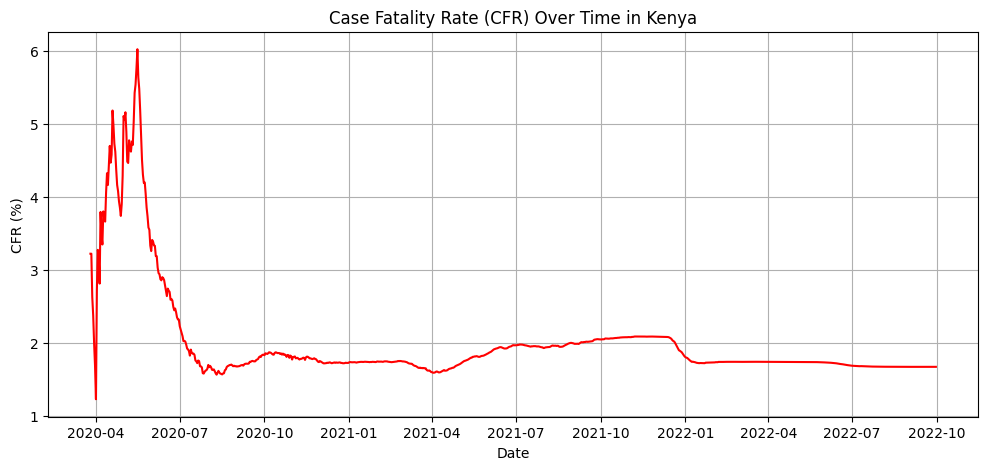

In [14]:
df['CFR'] = (df['total_deaths'] / df['total_cases']) * 100

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['CFR'], color='red')
plt.title('Case Fatality Rate (CFR) Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('CFR (%)')
plt.grid(True)
plt.show()


In [16]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 41.3/41.3 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


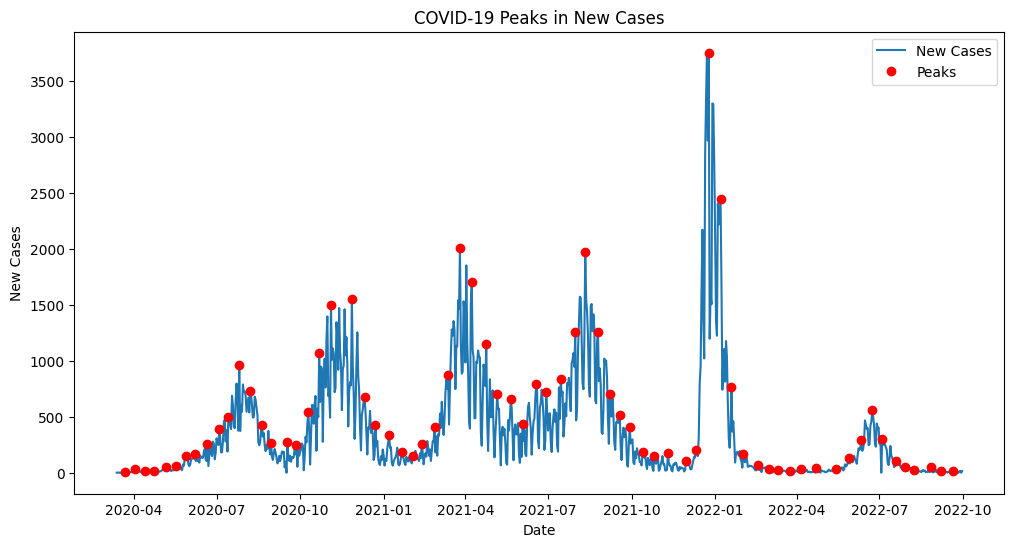

In [18]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Detect peaks
peaks, _ = find_peaks(df['new_cases'], distance=10)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], label='New Cases')
plt.plot(df['date'].iloc[peaks], df['new_cases'].iloc[peaks], 'ro', label='Peaks')
plt.title('COVID-19 Peaks in New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()


In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Make sure the folder exists
if not os.path.exists("Screenshots"):
    os.makedirs("Screenshots")

# Example 1: Daily New Cases with 7-day Moving Average
df['7_day_avg'] = df['new_cases'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['new_cases'], label='Daily New Cases')
plt.plot(df['date'], df['7_day_avg'], label='7-Day Average', color='orange')
plt.title('COVID-19 Daily New Cases in Kenya')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Screenshots/daily_new_cases.png")  # Save plot
plt.close()  # Close to free memory

# Example 2: Case Fatality Rate (CFR) Over Time
df['CFR'] = (df['total_deaths'] / df['total_cases']) * 100

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['CFR'], color='red')
plt.title('Case Fatality Rate (CFR) Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('CFR (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Screenshots/cfr_over_time.png")
plt.close()

# Example 3: Vaccination vs New Cases
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['people_vaccinated_per_hundred'], label='Vaccination (%)', color='green')
plt.plot(df['date'], df['new_cases'], label='New Cases', color='blue', alpha=0.5)
plt.title('Vaccination vs New Cases in Kenya')
plt.xlabel('Date')
plt.ylabel('Count / Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Screenshots/vaccination_vs_cases.png")
plt.close()


NameError: name 'df' is not defined